<a href="https://colab.research.google.com/github/DerinOgrenme2021/MucahitSoylemez/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

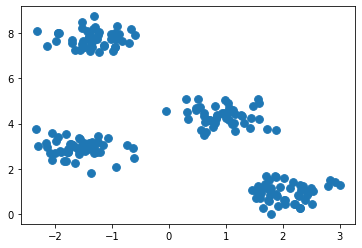

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y =make_blobs(n_samples=200,centers=4, cluster_std=0.4, random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:, 1],s=60)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([5, 0, 4, 1, 2, 3, 0, 4, 4, 4, 4, 2, 0, 0, 5, 4, 1, 1, 1, 5, 1, 0,
       2, 0, 5, 2, 1, 2, 2, 4, 1, 4, 0, 5, 0, 4, 0, 4, 3, 1, 1, 1, 1, 4,
       2, 0, 4, 1, 1, 4, 1, 0, 0, 1, 4, 1, 0, 2, 3, 5, 1, 4, 5, 4, 1, 4,
       2, 1, 0, 0, 2, 2, 4, 4, 0, 1, 0, 0, 5, 2, 1, 3, 5, 0, 0, 3, 4, 2,
       0, 0, 1, 1, 1, 3, 3, 5, 0, 1, 4, 3, 1, 5, 5, 1, 1, 0, 4, 5, 5, 4,
       1, 0, 0, 2, 2, 4, 0, 0, 1, 4, 1, 0, 3, 2, 4, 0, 4, 0, 2, 4, 0, 5,
       0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 5, 2, 0, 2, 4, 5, 0, 1, 1, 1, 4, 0,
       2, 3, 1, 0, 1, 5, 1, 2, 2, 0, 0, 1, 4, 2, 5, 0, 5, 4, 0, 1, 1, 1,
       3, 3, 0, 3, 0, 2, 4, 2, 4, 0, 0, 1, 3, 1, 2, 2, 4, 1, 0, 0, 0, 4,
       1, 5], dtype=int32)

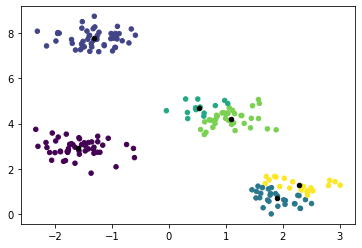

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans, s=20)
cent = kmeans.cluster_centers_
plt.scatter(cent[:,0],cent[:,1], c='black',s=20)

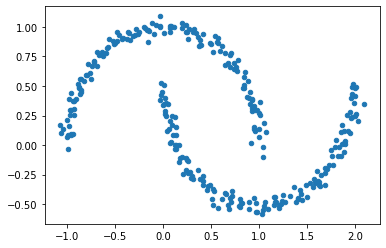

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(300,noise=0.04,random_state=0)
plt.scatter(X[:,0],X[:,1], s=20)

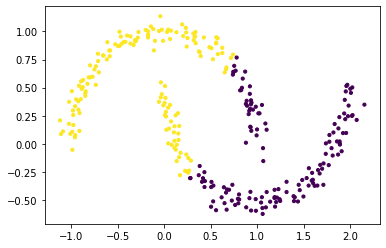

In [ ]:
y_pred = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, s=10)

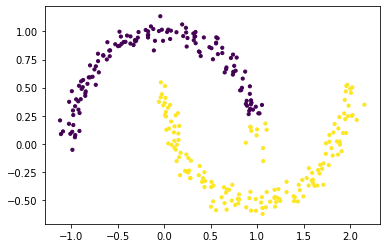

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=10)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

kmeans = KMeans(n_clusters=10,random_state=0)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_
print(centers.data.shape)

(1797, 64)
(10, 64)


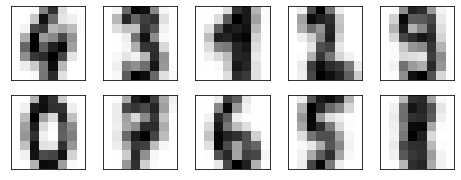

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(8,3))

centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)
  

In [74]:
clusters

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

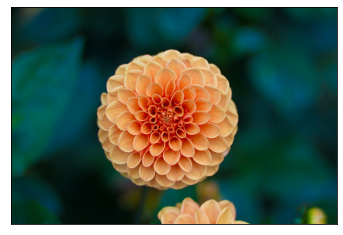

In [75]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax= plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [76]:
data = flower / 255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [78]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_color = kmeans.cluster_centers_[kmeans.predict(data)]
new_color

array([[0.01149942, 0.06940811, 0.04677757],
       [0.01149942, 0.06940811, 0.04677757],
       [0.01149942, 0.06940811, 0.04677757],
       ...,
       [0.02896856, 0.13447355, 0.09863393],
       [0.02896856, 0.13447355, 0.09863393],
       [0.02896856, 0.13447355, 0.09863393]])

Text(0.5, 1.0, 'Compressed Image')

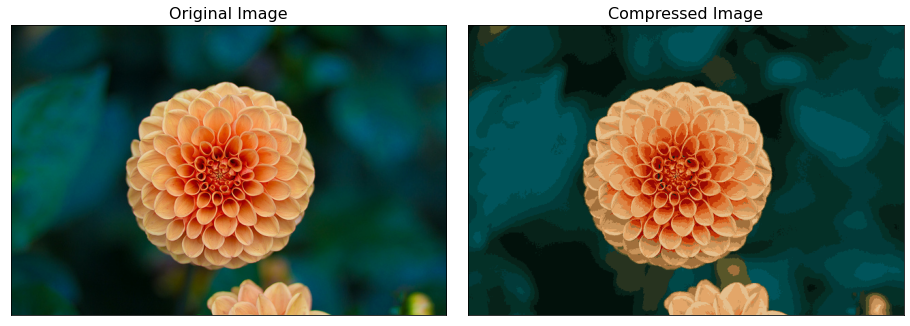

In [80]:
flower_compressed = new_color.reshape(flower.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(flower)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(flower_compressed)
ax[1].set_title("Compressed Image", size=16)